In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/uiuc-cse/data-fa14/gh-pages/data/iris.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### Univariate analysis

In [3]:
df_setosa = df.loc[df['species']=='setosa']
df_virginica = df.loc[df['species']=='virginica']
df_versicolor = df.loc[df['species']=='versicolor']

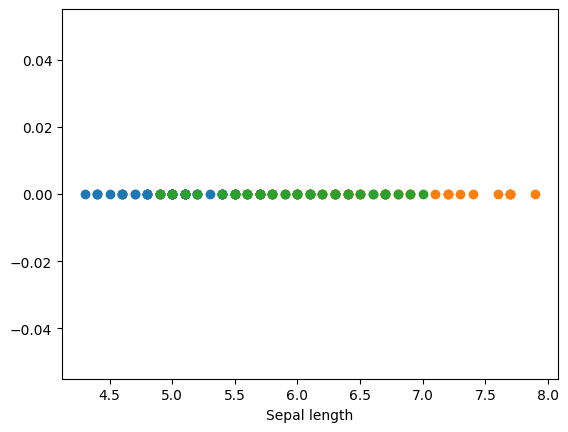

In [4]:
plt.plot(df_setosa['sepal_length'], np.zeros_like(df_setosa['sepal_length']),'o')
plt.plot(df_virginica['sepal_length'], np.zeros_like(df_virginica['sepal_length']),'o')
plt.plot(df_versicolor['sepal_length'], np.zeros_like(df_versicolor['sepal_length']),'o')

plt.xlabel('Sepal length')
plt.show()

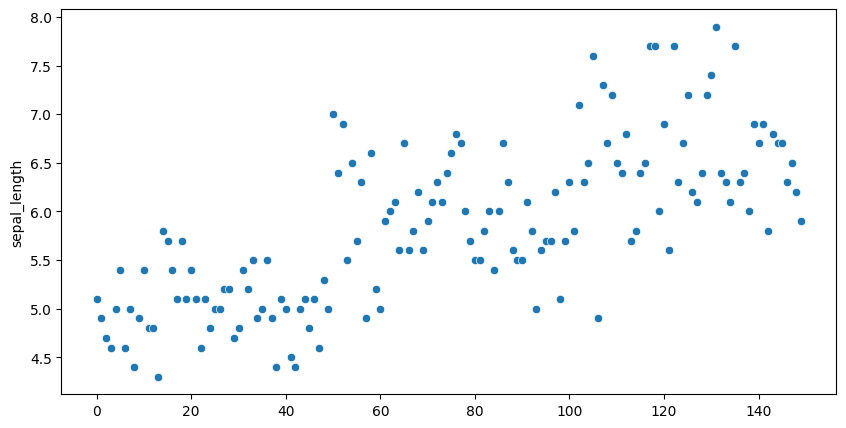

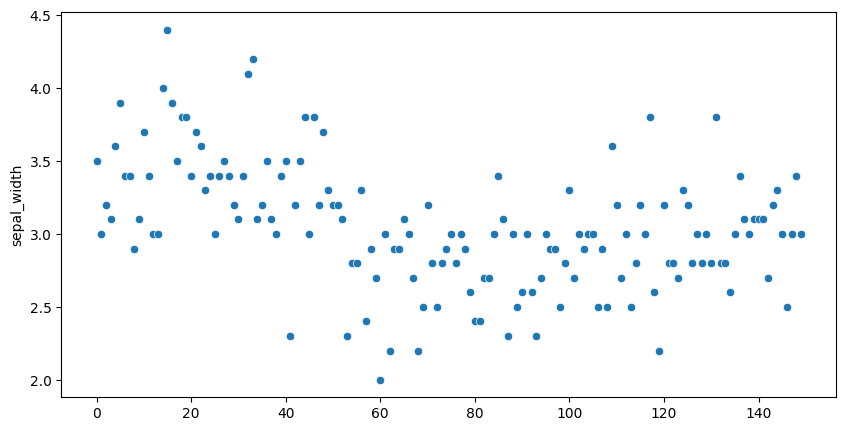

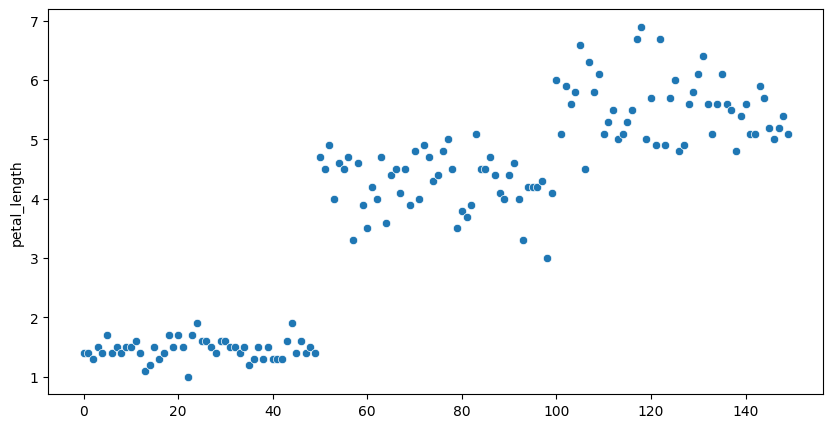

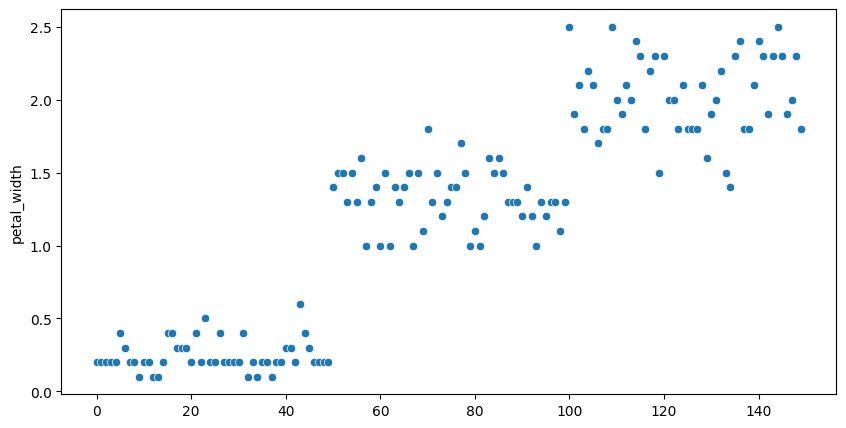

In [5]:
columns = ['sepal_length','sepal_width','petal_length','petal_width']
for i in columns:
    fig = plt.subplots(figsize=(10,5))
    sns.scatterplot(data=df[i])

In [6]:
df_virginica.count()

sepal_length    50
sepal_width     50
petal_length    50
petal_width     50
species         50
dtype: int64

## Bivariate analysis

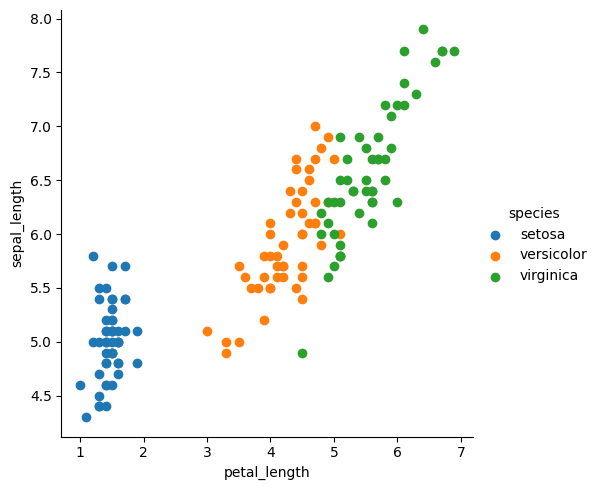

In [7]:
sns.FacetGrid(df, hue= 'species', height=5).map(plt.scatter,'petal_length','sepal_length').add_legend()
plt.show()

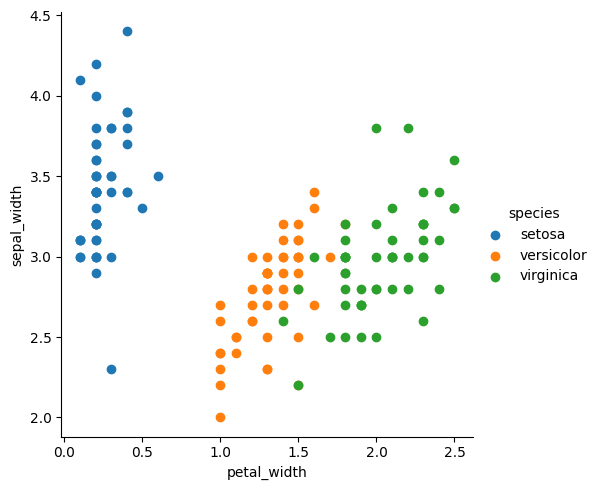

In [8]:
sns.FacetGrid(df, hue= 'species', height=5).map(plt.scatter,'petal_width','sepal_width').add_legend()
plt.show()

### Multivariate analysis

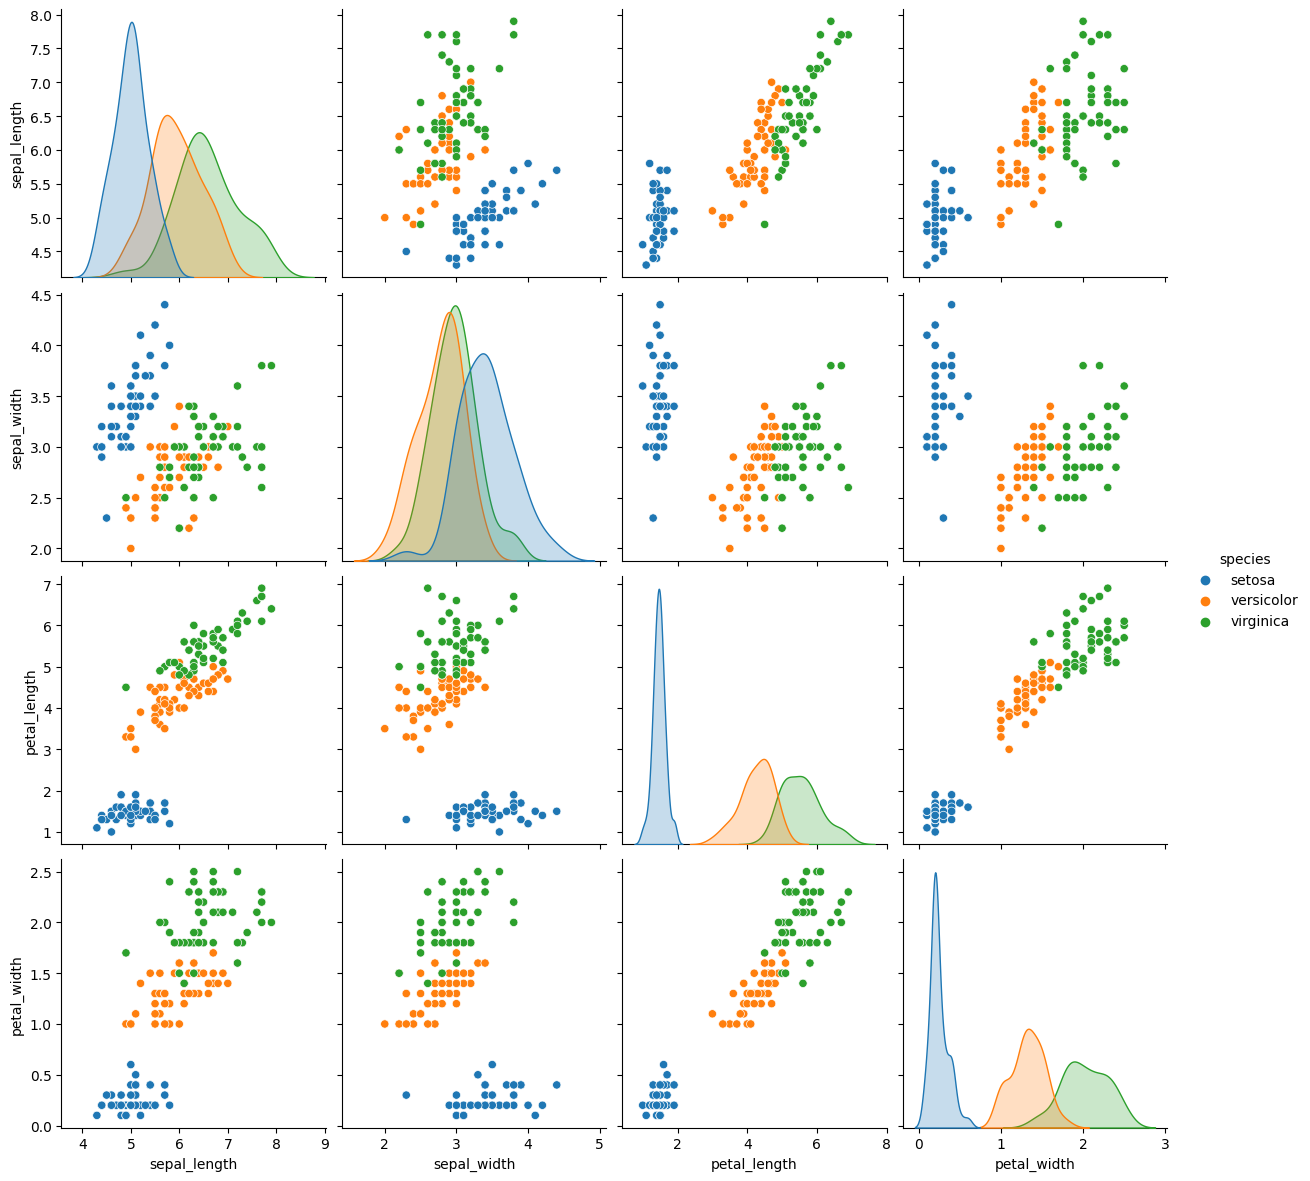

In [9]:
sns.pairplot(df, hue='species',height= 3)
plt.show()

## Encoding

In [10]:
df.replace({'species':{'setosa':0, 'virginica':1, 'versicolor':2}},inplace=True)

In [11]:
df['species'].nunique()

3

## Model building

In [12]:
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

## Separating data

In [13]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [14]:
X = df.drop(columns='species')
Y = df['species']

## Spliting into Training data and Testing data 

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=42)

In [16]:
print(X.shape, X_train.shape, X_test.shape)

(150, 4) (120, 4) (30, 4)


In [17]:
print(Y.shape, Y_train.shape, Y_test.shape)

(150,) (120,) (30,)


## Model training

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [19]:
lr = LogisticRegression()
svc = SVC()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()

In [20]:
lr.fit(X_train,Y_train)
svc.fit(X_train,Y_train)
dt.fit(X_train,Y_train)
rf.fit(X_train,Y_train)

RandomForestClassifier()

## Model evaluation

In [21]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [22]:
y_pred1 = lr.predict(X_test)
y_pred2 = svc.predict(X_test)
y_pred3 = dt.predict(X_test)
y_pred4 = rf.predict(X_test)

In [23]:
print('Logistic Regression:')
print('Accuracy Score: ',accuracy_score(Y_test,y_pred1))
print('Confusion Matrix:\n ',confusion_matrix(Y_test,y_pred1))
print('Classification Report:\n ',classification_report(Y_test,y_pred1))
print('-------------------------------------------------------')

print('SVM:')
print('Accuracy Score: ',accuracy_score(Y_test,y_pred2))
print('Confusion Matrix:\n ',confusion_matrix(Y_test,y_pred2))
print('Classification Report:\n ',classification_report(Y_test,y_pred2))
print('-------------------------------------------------------')

print('Decision Tree:')
print('Accuracy Score: ',accuracy_score(Y_test,y_pred3))
print('Confusion Matrix:\n ',confusion_matrix(Y_test,y_pred3))
print('Classification Report:\n ',classification_report(Y_test,y_pred3))
print('-------------------------------------------------------')

print('Random Forest:')
print('Accuracy Score: ',accuracy_score(Y_test,y_pred4))
print('Confusion Matrix:\n ',confusion_matrix(Y_test,y_pred4))
print('Classification Report:\n ',classification_report(Y_test,y_pred4))
print('-------------------------------------------------------')

Logistic Regression:
Accuracy Score:  1.0
Confusion Matrix:
  [[10  0  0]
 [ 0 11  0]
 [ 0  0  9]]
Classification Report:
                precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00         9

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

-------------------------------------------------------
SVM:
Accuracy Score:  1.0
Confusion Matrix:
  [[10  0  0]
 [ 0 11  0]
 [ 0  0  9]]
Classification Report:
                precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00         9

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weigh

# Thank you!